# Load And Import Data

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC                         
from sklearn.naive_bayes import GaussianNB         
from sklearn.tree import DecisionTreeClassifier                           
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Label Encoder/One Hot Encoder
from sklearn.metrics import confusion_matrix #Confusion Matrix

In [3]:
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
print("Shape of the dataset {}".format(df.shape))

Shape of the dataset (55500, 15)


In [8]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total= df.isnull().sum().sort_values(ascending=False) #sorting the data
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percentage
Name,0,0.0
Age,0,0.0
Gender,0,0.0
Blood Type,0,0.0
Medical Condition,0,0.0
Date of Admission,0,0.0
Doctor,0,0.0
Hospital,0,0.0
Insurance Provider,0,0.0
Billing Amount,0,0.0


In [9]:
def identify_columns(dataframe):
    numeric_features = [feature for feature in dataframe.columns if dataframe[feature].dtype != 'O']
    categorical_features = [feature for feature in dataframe.columns if dataframe[feature].dtype == 'O']
    print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
    print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

identify_columns(df)

We have 3 numerical features: ['Age', 'Billing Amount', 'Room Number']
We have 12 categorical features: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


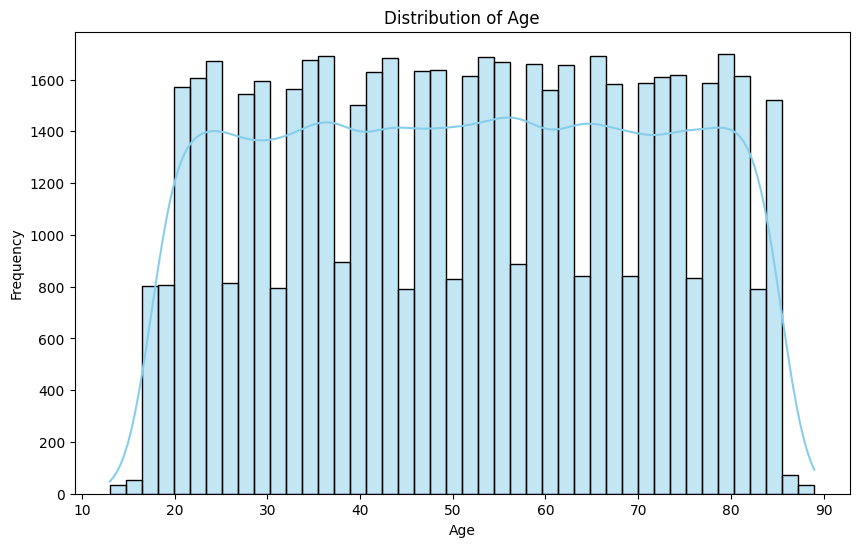

In [10]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

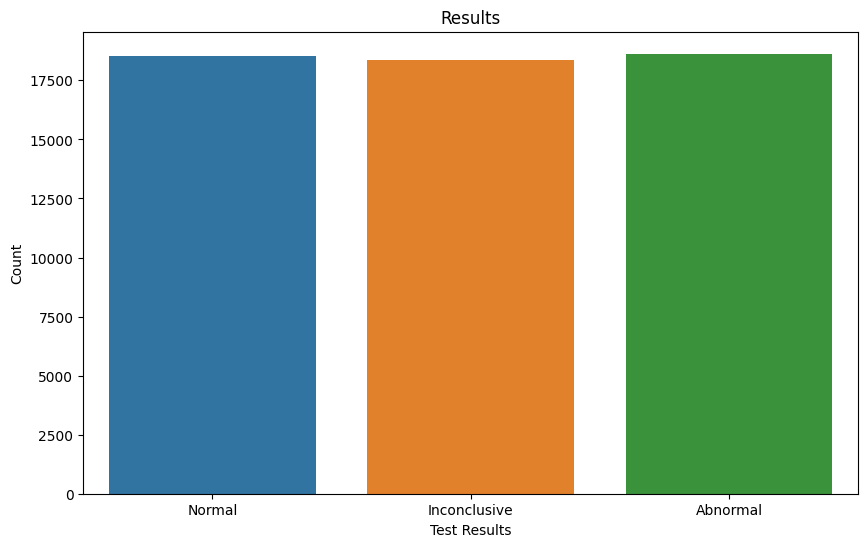

In [11]:
# Analyzing categories count
plt.figure(figsize=(10, 6))
sns.countplot(df, x="Test Results")
plt.title('Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

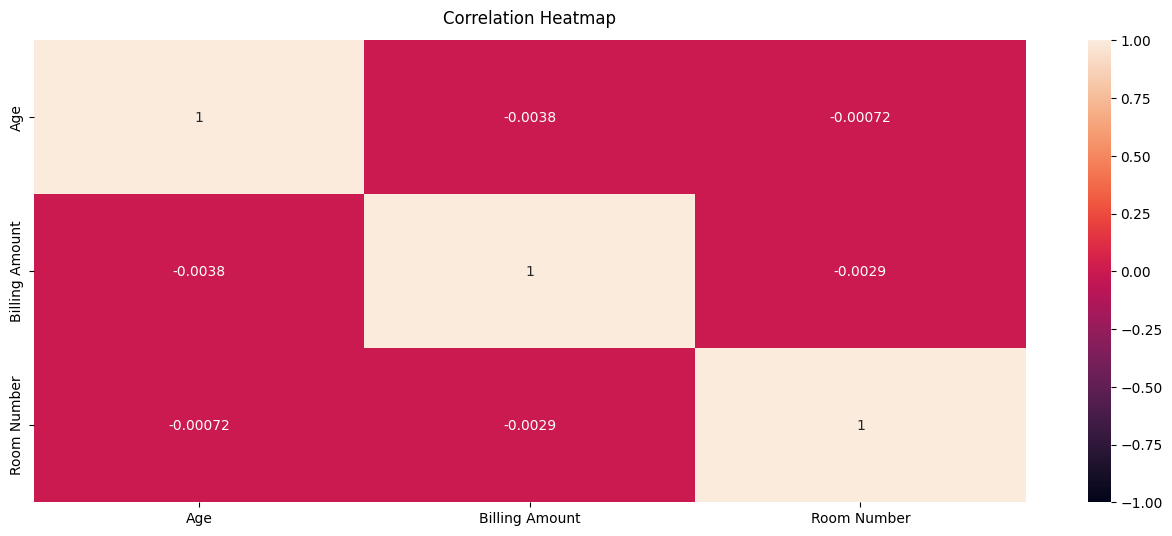

In [12]:
numeric_data = df.drop(columns = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']) 
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Preprocessing Data

In [13]:
#Label Encoding
def encode_features(dataframe):
    le = LabelEncoder()
    for col in ['Gender', 'Test Results']:
        if col in dataframe.columns:
            dataframe[col] = le.fit_transform(dataframe[col])
    
    return dataframe

df = encode_features(df)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,1,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,2
1,LesLie TErRy,62,1,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,1
2,DaNnY sMitH,76,0,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,2
3,andrEw waTtS,28,0,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,0
4,adrIENNE bEll,43,0,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,0,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,0
55496,KYle pEREz,61,0,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,2
55497,HEATher WaNG,38,0,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,0
55498,JENniFER JOneS,43,1,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,0


In [14]:
#One Hot Encoding
def apply_one_hot_encoding(dataframe):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    categorical_cols = ['Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Insurance Provider']
    dataframe =pd.concat([
    dataframe.drop(categorical_cols, axis=1),
    pd.DataFrame(encoder.fit_transform(dataframe[categorical_cols]), columns=encoder.get_feature_names_out())], axis=1)
    return dataframe

df = apply_one_hot_encoding(df)

In [15]:
df

,Name,Age,Gender,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Test Results,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,Bobby JacksOn,30,1,2024-01-31,Matthew Smith,Sons and Miller,18856.281306,328,2024-02-02,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,LesLie TErRy,62,1,2019-08-20,Samantha Davies,Kim Inc,33643.327287,265,2019-08-26,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,DaNnY sMitH,76,0,2022-09-22,Tiffany Mitchell,Cook PLC,27955.096079,205,2022-10-07,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,andrEw waTtS,28,0,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",37909.782410,450,2020-12-18,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,adrIENNE bEll,43,0,2022-09-19,Kathleen Hanna,White-White,14238.317814,458,2022-10-09,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,0,2020-08-16,Joshua Jarvis,Jones-Thompson,2650.714952,417,2020-09-15,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
55496,KYle pEREz,61,0,2020-01-23,Taylor Sullivan,Tucker-Moyer,31457.797307,316,2020-02-01,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55497,HEATher WaNG,38,0,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",27620.764717,347,2020-08-10,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55498,JENniFER JOneS,43,1,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",32451.092358,321,2019-05-31,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
#Dropping Date of Admission, Name, Doctor, Hospital, Discharge Date
df = df.drop(columns = ['Date of Admission', 'Name', 'Doctor', 'Hospital', 'Discharge Date'])
df

,Age,Gender,Billing Amount,Room Number,Test Results,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,30,1,18856.281306,328,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,62,1,33643.327287,265,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,76,0,27955.096079,205,2,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28,0,37909.782410,450,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43,0,14238.317814,458,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,0,2650.714952,417,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
55496,61,0,31457.797307,316,2,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55497,38,0,27620.764717,347,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55498,43,1,32451.092358,321,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train/Test slit dataset

In [17]:
#Creating X and y data
X = df.drop(columns = 'Test Results') 
y = df['Test Results'] #Target value

#Splitting the Data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

In [18]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
#model = RandomForestClassifier(max_depth = 15, random_state = 5)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.3687687687687688


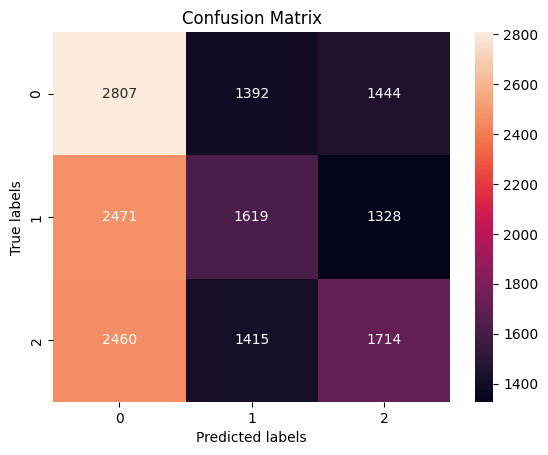

In [20]:
# Modify the confusion matrix visualizationdefplot_confusion_matrix(y_test,y_pred):
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
#plt.xticks(ticks=[0.5, 1.5], labels=['', '',''])
#plt.yticks(ticks=[0.5, 1.5], labels=['', '',''])
plt.show()

In [21]:
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print("Test Accuracy:",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

evaluate_model(model,X_test,y_test)

Test Accuracy: 0.3687687687687688
              precision    recall  f1-score   support

           0       0.36      0.50      0.42      5643
           1       0.37      0.30      0.33      5418
           2       0.38      0.31      0.34      5589

    accuracy                           0.37     16650
   macro avg       0.37      0.37      0.36     16650
weighted avg       0.37      0.37      0.36     16650

